In [1]:
import numpy as np
from activations import ReLU, LeakyReLU, Tanh, Softmax, Sigmoid
from losses import CrossEntropy, MSELoss
from layers import Linear
from layers import L2regularization, Dropout
from model import Model
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

##  Stochastic Gradient Descent
In this exercise you are given the PyTorch model and the training loop which uses Stochastic Gradient Descent. We train the model for 10 epochs with batch size equal to 4.   
Your task is to implement the same model using Model class which we got from the previous assignment. Use the same hyperparameters (batch size, number of epochs, learning rate) for training. Adapt the training process from the previous assignment so that it uses mini-batches instead of the loading the whole training set at once. You are expected to achieve the same performance on your model as with PyTorch model (around 80% accuracy on the test data after training for 10 epochs).   
Additionally, record both the training and test loss every 2000 minibatches both for PyTorch model and your model. Plot the loss graphs and comment on the differences between them (if any). For each model, the graphs of train and test loss should be displayed on one plot.

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),])
batch_size = 4


trainset = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = datasets.MNIST(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 200, bias=False)
        self.layer2 = nn.Linear(200, 80, bias=False)
        self.layer3 = nn.Linear(80, 10, bias=False)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        x = self.layer3(x)
        return x

net = Net()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0)

In [5]:
pytorch_train_loss = []
pytorch_test_loss= []
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
       
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            pytorch_train_loss.append(running_loss / 2000)
            running_loss = 0.0
            running_testloss = 0.0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    outputs = net(images)
                    loss = criterion(outputs, labels)
                    running_testloss+=loss
                pytorch_test_loss.append(running_testloss/(batch_size*len(testloader)))
             
print('Finished Training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.300
[1,  6000] loss: 2.300
[1,  8000] loss: 2.297
[1, 10000] loss: 2.296
[1, 12000] loss: 2.295
[1, 14000] loss: 2.292
[2,  2000] loss: 2.290
[2,  4000] loss: 2.289
[2,  6000] loss: 2.286
[2,  8000] loss: 2.285
[2, 10000] loss: 2.281
[2, 12000] loss: 2.280
[2, 14000] loss: 2.275
[3,  2000] loss: 2.268
[3,  4000] loss: 2.264
[3,  6000] loss: 2.259
[3,  8000] loss: 2.251
[3, 10000] loss: 2.243
[3, 12000] loss: 2.235
[3, 14000] loss: 2.222
[4,  2000] loss: 2.198
[4,  4000] loss: 2.178
[4,  6000] loss: 2.157
[4,  8000] loss: 2.126
[4, 10000] loss: 2.086
[4, 12000] loss: 2.046
[4, 14000] loss: 1.996
[5,  2000] loss: 1.910
[5,  4000] loss: 1.846
[5,  6000] loss: 1.777
[5,  8000] loss: 1.723
[5, 10000] loss: 1.654
[5, 12000] loss: 1.597
[5, 14000] loss: 1.538
[6,  2000] loss: 1.467
[6,  4000] loss: 1.429
[6,  6000] loss: 1.388
[6,  8000] loss: 1.346
[6, 10000] loss: 1.301
[6, 12000] loss: 1.276
[6, 14000] loss: 1.240
[7,  2000] loss: 1.180
[7,  4000] 

In [6]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

Accuracy of the network on the 10000 test images: 79 %


In [30]:
from model import Model
np.random.seed(123)

# Your code for defining a model goes here
layer1 = Linear(784, 200)
activation1 = Sigmoid()
layer2 = Linear(200, 80)
activation2 = Sigmoid()
layer3 = Linear(80, 10)
loss = CrossEntropy()

m = Model([layer1, activation1, layer2, activation2,layer3])

In [8]:
# Train the model for 10 epochs using SGD
model_train_loss = []
model_test_loss= []
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        outputs = m.forward(inputs.reshape(inputs.shape[0],-1).numpy())
        labels = labels.numpy()
        labels = np.eye(10)[labels]
        loss_value = loss(outputs, labels)
        grads = m.backward(loss.grad())
        m.update_parameters(grads, 0.001)
        running_loss += loss_value
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            model_train_loss.append(running_loss / 2000)
            running_loss = 0.0
            running_testloss = 0.0
            for data in testloader:
                images, labels = data
                outputs = m.forward(images.reshape(images.shape[0],-1).numpy())
                labels = labels.numpy()
                labels = np.eye(10)[labels]
                loss_value = loss(outputs, labels)
                running_testloss+=loss_value
            model_test_loss.append(running_testloss/(batch_size*len(testloader)))
             

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.299
[1,  6000] loss: 2.296
[1,  8000] loss: 2.295
[1, 10000] loss: 2.291
[1, 12000] loss: 2.289
[1, 14000] loss: 2.285
[2,  2000] loss: 2.279
[2,  4000] loss: 2.276
[2,  6000] loss: 2.272
[2,  8000] loss: 2.266
[2, 10000] loss: 2.261
[2, 12000] loss: 2.253
[2, 14000] loss: 2.245
[3,  2000] loss: 2.229
[3,  4000] loss: 2.216
[3,  6000] loss: 2.201
[3,  8000] loss: 2.183
[3, 10000] loss: 2.158
[3, 12000] loss: 2.129
[3, 14000] loss: 2.096
[4,  2000] loss: 2.035
[4,  4000] loss: 1.980
[4,  6000] loss: 1.918
[4,  8000] loss: 1.857
[4, 10000] loss: 1.786
[4, 12000] loss: 1.710
[4, 14000] loss: 1.640
[5,  2000] loss: 1.540
[5,  4000] loss: 1.490
[5,  6000] loss: 1.430
[5,  8000] loss: 1.374
[5, 10000] loss: 1.319
[5, 12000] loss: 1.289
[5, 14000] loss: 1.237
[6,  2000] loss: 1.177
[6,  4000] loss: 1.131
[6,  6000] loss: 1.099
[6,  8000] loss: 1.090
[6, 10000] loss: 1.060
[6, 12000] loss: 1.022
[6, 14000] loss: 0.984
[7,  2000] loss: 0.953
[7,  4000] 

In [34]:
# Evaluate the performance of the model by computing the accuracy on test data
correct = 0
total = 0

for data in testloader:
    images, labels = data
    outputs = m.forward(images.reshape(inputs.shape[0],-1).numpy())
    predicted = np.argmax(outputs,axis=1)
    total += labels.size(0)
    correct += (predicted == labels.numpy()).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

Accuracy of the network on the 10000 test images: 99 %


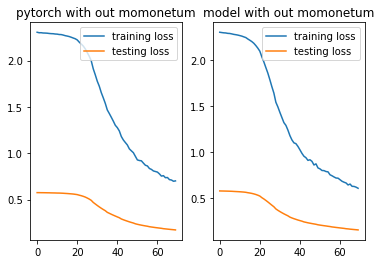

In [10]:
# Plot the loss graphs for PyTorch model and your model (train and test losses should be on the same plot) 
# and comment on differences (if any)

#plot 1:
plt.subplot(1, 2, 1)
plt.plot(pytorch_train_loss,label = "training loss")
plt.plot(pytorch_test_loss,label = "testing loss")
plt.title("pytorch with out momonetum")
plt.legend()

#plot 2:

plt.subplot(1, 2, 2)
plt.plot(model_train_loss,label = "training loss")
plt.plot(model_test_loss,label = "testing loss")
plt.title("model with out momonetum")
plt.legend()
plt.show()


##  Stochastic Gradient Descent with Momentum
As it was discussed during the lecture, momentum helps to accelerate gradient in the right direction and helps to solve some problems related with optimization.  
Train the PyTorch model using SGD with Momentum while keeping other hyperparameters the same. Try to find the optimal value for momentum for the given problem (you can use the test data as validation data since it's more or less toy exercise).  
Implement the training with momentum for your Model class. Your code must be contained in `sgd_momentum` method in model.py. You can change the arguments of the function according to your needs, but please keep the implementation there. 
Evaluate the performance of both models on test data. Did the accuracy improved for the same number of epochs trained?  
Again, keep the record of train loss and test loss every 2000 minibatches for both models, plot them and comment on the differences between two models and between SGD with Momentum and without Momentum 

In [11]:
# incorporate momentum for training the PyTorch model
net_momentum = Net()
optimizer = optim.SGD(net_momentum.parameters(), lr=0.001, momentum=0.9)
pytorch_train_loss_momentum = []
pytorch_test_loss_momentum=[]
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net_momentum(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
       
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            pytorch_train_loss_momentum.append(running_loss / 2000)
            running_loss = 0.0
            running_testloss = 0.0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    outputs = net_momentum(images)
                    loss = criterion(outputs, labels)
                    running_testloss+=loss
                pytorch_test_loss_momentum.append(running_testloss/(batch_size*len(testloader)))
print('Finished Training')

[1,  2000] loss: 2.306
[1,  4000] loss: 2.284
[1,  6000] loss: 2.208
[1,  8000] loss: 1.818
[1, 10000] loss: 1.302
[1, 12000] loss: 1.001
[1, 14000] loss: 0.815
[2,  2000] loss: 0.656
[2,  4000] loss: 0.561
[2,  6000] loss: 0.516
[2,  8000] loss: 0.478
[2, 10000] loss: 0.454
[2, 12000] loss: 0.439
[2, 14000] loss: 0.404
[3,  2000] loss: 0.402
[3,  4000] loss: 0.377
[3,  6000] loss: 0.375
[3,  8000] loss: 0.371
[3, 10000] loss: 0.341
[3, 12000] loss: 0.327
[3, 14000] loss: 0.336
[4,  2000] loss: 0.338
[4,  4000] loss: 0.305
[4,  6000] loss: 0.317
[4,  8000] loss: 0.320
[4, 10000] loss: 0.294
[4, 12000] loss: 0.300
[4, 14000] loss: 0.296
[5,  2000] loss: 0.292
[5,  4000] loss: 0.282
[5,  6000] loss: 0.280
[5,  8000] loss: 0.273
[5, 10000] loss: 0.269
[5, 12000] loss: 0.263
[5, 14000] loss: 0.270
[6,  2000] loss: 0.254
[6,  4000] loss: 0.257
[6,  6000] loss: 0.248
[6,  8000] loss: 0.243
[6, 10000] loss: 0.229
[6, 12000] loss: 0.250
[6, 14000] loss: 0.237
[7,  2000] loss: 0.235
[7,  4000] 

In [25]:
# incorporate momentum for training your model
loss = CrossEntropy()
m_momentum = Model([layer1, activation1, layer2, activation2,layer3])
model_train_loss_momentum = []
model_test_loss_momentum= []
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        outputs = m_momentum.forward(inputs.reshape(inputs.shape[0],-1).numpy())
        labels = labels.numpy()
        labels = np.eye(10)[labels]
        loss_value = loss(outputs, labels)
        grads = m_momentum.backward(loss.grad())
        m_momentum.sgd_momentum(grads, 0.001,0.9)
        running_loss += loss_value
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            model_train_loss_momentum.append(running_loss / 2000)
            running_loss = 0.0
            running_testloss = 0.0
            for data in testloader:
                images, labels = data
                outputs = m_momentum.forward(images.reshape(images.shape[0],-1).numpy())
                labels = labels.numpy()
                labels = np.eye(10)[labels]
                loss_value = loss(outputs, labels)
                running_testloss+=loss_value
            model_test_loss_momentum.append(running_testloss/(batch_size*len(testloader)))
             

print('Finished Training')

[1,  2000] loss: 2.300
[1,  4000] loss: 2.236
[1,  6000] loss: 1.925
[1,  8000] loss: 1.339
[1, 10000] loss: 1.005
[1, 12000] loss: 0.827
[1, 14000] loss: 0.720
[2,  2000] loss: 0.566
[2,  4000] loss: 0.498
[2,  6000] loss: 0.462
[2,  8000] loss: 0.450
[2, 10000] loss: 0.431
[2, 12000] loss: 0.409
[2, 14000] loss: 0.379
[3,  2000] loss: 0.358
[3,  4000] loss: 0.364
[3,  6000] loss: 0.347
[3,  8000] loss: 0.329
[3, 10000] loss: 0.340
[3, 12000] loss: 0.347
[3, 14000] loss: 0.314
[4,  2000] loss: 0.304
[4,  4000] loss: 0.307
[4,  6000] loss: 0.303
[4,  8000] loss: 0.303
[4, 10000] loss: 0.284
[4, 12000] loss: 0.303
[4, 14000] loss: 0.299
[5,  2000] loss: 0.280
[5,  4000] loss: 0.281
[5,  6000] loss: 0.267
[5,  8000] loss: 0.252
[5, 10000] loss: 0.270
[5, 12000] loss: 0.254
[5, 14000] loss: 0.258
[6,  2000] loss: 0.232
[6,  4000] loss: 0.243
[6,  6000] loss: 0.244
[6,  8000] loss: 0.234
[6, 10000] loss: 0.241
[6, 12000] loss: 0.231
[6, 14000] loss: 0.245
[7,  2000] loss: 0.224
[7,  4000] 

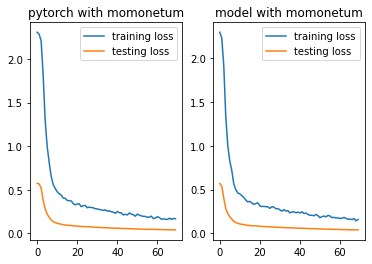

In [26]:
# Plot the loss graphs for PyTorch model and your model (train and test losses should be on the same plot) 
# and comment on differences (if any) between two models and between SGD with Momentum and without Momentum 
#plot 1:
plt.subplot(1, 2, 1)
plt.plot(pytorch_train_loss_momentum,label = "training loss")
plt.plot(pytorch_test_loss_momentum,label = "testing loss")
plt.title("pytorch with momonetum")
plt.legend()

#plot 2:
plt.subplot(1, 2, 2)
plt.plot(model_train_loss_momentum,label = "training loss")
plt.plot(model_test_loss_momentum,label = "testing loss")
plt.title("model with momonetum")
plt.legend()
plt.show()

##  AdaGrad
Train the PyTorch model using AdaGram while keeping other hyperparameters the same  
Implement the training with AdaGrad for your Model class. Your code must be contained in to `ada_grad` method in model.py. You can change the arguments of the function according to your needs, but please keep the implementation there. 
Evaluate the performance of both models on test data. Did the accuracy improved for the same number of epochs trained?  
Again, keep the record of train loss and test loss after every 2000 minibatches for both models, plot them and comment on the differences between two models and between AdaGrad and the previous optimization techniques.

In [16]:
# incorporate AdaGrad for training the PyTorch model
net_adagrad = Net()
optimizer = optim.Adagrad(net_adagrad.parameters(), lr=0.001)
pytorch_train_loss_adagrad = []
pytorch_test_loss_adagrad=[]
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net_adagrad(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
       
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            pytorch_train_loss_adagrad.append(running_loss / 2000)
            running_loss = 0.0
            running_testloss = 0.0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    outputs = net_adagrad(images)
                    loss = criterion(outputs, labels)
                    running_testloss+=loss
                pytorch_test_loss_adagrad.append(running_testloss/(batch_size*len(testloader)))
print('Finished Training')

[1,  2000] loss: 2.212
[1,  4000] loss: 2.069
[1,  6000] loss: 1.935
[1,  8000] loss: 1.815
[1, 10000] loss: 1.717
[1, 12000] loss: 1.630
[1, 14000] loss: 1.562
[2,  2000] loss: 1.457
[2,  4000] loss: 1.396
[2,  6000] loss: 1.356
[2,  8000] loss: 1.309
[2, 10000] loss: 1.264
[2, 12000] loss: 1.228
[2, 14000] loss: 1.196
[3,  2000] loss: 1.140
[3,  4000] loss: 1.114
[3,  6000] loss: 1.085
[3,  8000] loss: 1.077
[3, 10000] loss: 1.041
[3, 12000] loss: 1.021
[3, 14000] loss: 1.000
[4,  2000] loss: 0.975
[4,  4000] loss: 0.947
[4,  6000] loss: 0.927
[4,  8000] loss: 0.919
[4, 10000] loss: 0.910
[4, 12000] loss: 0.890
[4, 14000] loss: 0.874
[5,  2000] loss: 0.860
[5,  4000] loss: 0.839
[5,  6000] loss: 0.830
[5,  8000] loss: 0.820
[5, 10000] loss: 0.808
[5, 12000] loss: 0.798
[5, 14000] loss: 0.796
[6,  2000] loss: 0.780
[6,  4000] loss: 0.756
[6,  6000] loss: 0.766
[6,  8000] loss: 0.743
[6, 10000] loss: 0.739
[6, 12000] loss: 0.736
[6, 14000] loss: 0.725
[7,  2000] loss: 0.705
[7,  4000] 

In [28]:
# incorporate AdaGrad for training your model
m_adagrad = Model([layer1, activation1, layer2, activation2,layer3])
loss = CrossEntropy()
model_train_loss_adagrad = []
model_test_loss_adagrad= []
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        outputs = m_adagrad.forward(inputs.reshape(inputs.shape[0],-1).numpy())
        labels = labels.numpy()
        labels = np.eye(10)[labels]
        loss_value = loss(outputs, labels)
        grads = m_adagrad.backward(loss.grad())
        m_adagrad.ada_grad(grads, 0.001)
        running_loss += loss_value
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            model_train_loss_adagrad.append(running_loss / 2000)
            running_loss = 0.0
            running_testloss = 0.0
            for data in testloader:
                images, labels = data
                outputs = m_adagrad.forward(images.reshape(images.shape[0],-1).numpy())
                labels = labels.numpy()
                labels = np.eye(10)[labels]
                loss_value = loss(outputs, labels)
                running_testloss+=loss_value
            model_test_loss_adagrad.append(running_testloss/(batch_size*len(testloader)))
             

print('Finished Training')

[1,  2000] loss: 2.193
[1,  4000] loss: 2.039
[1,  6000] loss: 1.903
[1,  8000] loss: 1.788
[1, 10000] loss: 1.701
[1, 12000] loss: 1.629
[1, 14000] loss: 1.565
[2,  2000] loss: 1.474
[2,  4000] loss: 1.426
[2,  6000] loss: 1.373
[2,  8000] loss: 1.341
[2, 10000] loss: 1.303
[2, 12000] loss: 1.272
[2, 14000] loss: 1.230
[3,  2000] loss: 1.189
[3,  4000] loss: 1.149
[3,  6000] loss: 1.129
[3,  8000] loss: 1.103
[3, 10000] loss: 1.075
[3, 12000] loss: 1.051
[3, 14000] loss: 1.033
[4,  2000] loss: 0.998
[4,  4000] loss: 0.978
[4,  6000] loss: 0.958
[4,  8000] loss: 0.947
[4, 10000] loss: 0.933
[4, 12000] loss: 0.915
[4, 14000] loss: 0.909
[5,  2000] loss: 0.884
[5,  4000] loss: 0.863
[5,  6000] loss: 0.847
[5,  8000] loss: 0.841
[5, 10000] loss: 0.828
[5, 12000] loss: 0.819
[5, 14000] loss: 0.812
[6,  2000] loss: 0.789
[6,  4000] loss: 0.783
[6,  6000] loss: 0.776
[6,  8000] loss: 0.759
[6, 10000] loss: 0.759
[6, 12000] loss: 0.737
[6, 14000] loss: 0.745
[7,  2000] loss: 0.731
[7,  4000] 

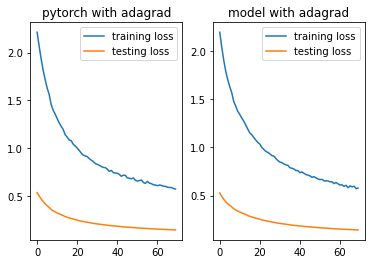

In [29]:
# Plot the loss graphs for PyTorch model and your model (train and test losses should be on the same plot) 
# and comment on differences (if any) between two models and between AdaGrad and the previous optimization techniques.
#plot 1:
plt.subplot(1, 2, 1)
plt.plot(pytorch_train_loss_adagrad,label = "training loss")
plt.plot(pytorch_test_loss_adagrad,label = "testing loss")
plt.title("pytorch with adagrad")
plt.legend()

#plot 2:
plt.subplot(1, 2, 2)
plt.plot(model_train_loss_adagrad,label = "training loss")
plt.plot(model_test_loss_adagrad,label = "testing loss")
plt.title("model with adagrad")
plt.legend()
plt.show()

## Adam 
Train the PyTorch model using Adam while keeping other hyperparameters the same  
Implement the training with Adam for your Model class. Your code must be contained in to `adam` method in model.py. You can change the arguments of the function according to your needs, but please keep the implementation there. 
Evaluate the performance of both models on test data. Did the accuracy improved for the same number of epochs trained?
Again, keep the record of train loss and test loss every 2000 minibatches for both models, plot them and comment on the differences between two models and between Adam and the previous optimization techniques.

In [19]:
# incorporate Adam for training the PyTorch model
net_adam = Net()
optimizer = optim.Adam(net_adam.parameters(), lr=0.001)
pytorch_train_loss_adam = []
pytorch_test_loss_adam=[]
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net_adam(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
       
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            pytorch_train_loss_adam.append(running_loss / 2000)
            running_loss = 0.0
            running_testloss = 0.0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    outputs = net_adam(images)
                    loss = criterion(outputs, labels)
                    running_testloss+=loss
                pytorch_test_loss_adam.append(running_testloss/(batch_size*len(testloader)))

[1,  2000] loss: 0.785
[1,  4000] loss: 0.305
[1,  6000] loss: 0.229
[1,  8000] loss: 0.201
[1, 10000] loss: 0.183
[1, 12000] loss: 0.172
[1, 14000] loss: 0.141
[2,  2000] loss: 0.104
[2,  4000] loss: 0.118
[2,  6000] loss: 0.110
[2,  8000] loss: 0.099
[2, 10000] loss: 0.106
[2, 12000] loss: 0.100
[2, 14000] loss: 0.101
[3,  2000] loss: 0.070
[3,  4000] loss: 0.067
[3,  6000] loss: 0.081
[3,  8000] loss: 0.067
[3, 10000] loss: 0.073
[3, 12000] loss: 0.062
[3, 14000] loss: 0.068
[4,  2000] loss: 0.042
[4,  4000] loss: 0.050
[4,  6000] loss: 0.047
[4,  8000] loss: 0.050
[4, 10000] loss: 0.050
[4, 12000] loss: 0.050
[4, 14000] loss: 0.060
[5,  2000] loss: 0.029
[5,  4000] loss: 0.036
[5,  6000] loss: 0.035
[5,  8000] loss: 0.035
[5, 10000] loss: 0.041
[5, 12000] loss: 0.039
[5, 14000] loss: 0.040
[6,  2000] loss: 0.023
[6,  4000] loss: 0.029
[6,  6000] loss: 0.028
[6,  8000] loss: 0.029
[6, 10000] loss: 0.027
[6, 12000] loss: 0.024
[6, 14000] loss: 0.034
[7,  2000] loss: 0.018
[7,  4000] 

In [31]:
# incorporate Adam for training your model
m_adam = Model([layer1, activation1, layer2, activation2,layer3])
loss = CrossEntropy()
model_train_loss_adam = []
model_test_loss_adam= []
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        outputs = m_adam.forward(inputs.reshape(inputs.shape[0],-1).numpy())
        labels = labels.numpy()
        labels = np.eye(10)[labels]
        loss_value = loss(outputs, labels)
        grads = m_adam.backward(loss.grad())
        m_adam.adam(grads, 0.001)
        running_loss += loss_value
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            model_train_loss_adam.append(running_loss / 2000)
            running_loss = 0.0
            running_testloss = 0.0
            for data in testloader:
                images, labels = data
                outputs = m_adam.forward(images.reshape(images.shape[0],-1).numpy())
                labels = labels.numpy()
                labels = np.eye(10)[labels]
                loss_value = loss(outputs, labels)
                running_testloss+=loss_value
            model_test_loss_adam.append(running_testloss/(batch_size*len(testloader)))

[1,  2000] loss: 0.790
[1,  4000] loss: 0.312
[1,  6000] loss: 0.235
[1,  8000] loss: 0.191
[1, 10000] loss: 0.182
[1, 12000] loss: 0.167
[1, 14000] loss: 0.156
[2,  2000] loss: 0.099
[2,  4000] loss: 0.110
[2,  6000] loss: 0.109
[2,  8000] loss: 0.111
[2, 10000] loss: 0.101
[2, 12000] loss: 0.100
[2, 14000] loss: 0.102
[3,  2000] loss: 0.067
[3,  4000] loss: 0.070
[3,  6000] loss: 0.077
[3,  8000] loss: 0.078
[3, 10000] loss: 0.063
[3, 12000] loss: 0.069
[3, 14000] loss: 0.064
[4,  2000] loss: 0.045
[4,  4000] loss: 0.044
[4,  6000] loss: 0.048
[4,  8000] loss: 0.059
[4, 10000] loss: 0.057
[4, 12000] loss: 0.054
[4, 14000] loss: 0.047
[5,  2000] loss: 0.032
[5,  4000] loss: 0.032
[5,  6000] loss: 0.040
[5,  8000] loss: 0.050
[5, 10000] loss: 0.036
[5, 12000] loss: 0.041
[5, 14000] loss: 0.039
[6,  2000] loss: 0.022
[6,  4000] loss: 0.022
[6,  6000] loss: 0.032
[6,  8000] loss: 0.032
[6, 10000] loss: 0.031
[6, 12000] loss: 0.033
[6, 14000] loss: 0.034
[7,  2000] loss: 0.017
[7,  4000] 

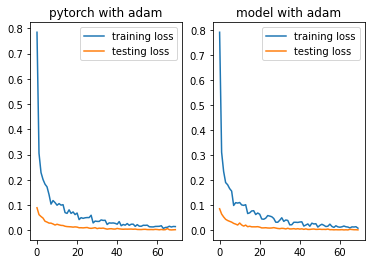

In [32]:
# Plot the loss graphs for PyTorch model and your model (train and test losses should be on the same plot) 
# and comment on differences (if any) between two models and between Adam and the previous optimization techniques.
#plot 1:
plt.subplot(1, 2, 1)
plt.plot(pytorch_train_loss_adam,label = "training loss")
plt.plot(pytorch_test_loss_adam,label = "testing loss")
plt.title("pytorch with adam")
plt.legend()

#plot 2:
plt.subplot(1, 2, 2)
plt.plot(model_train_loss_adam,label = "training loss")
plt.plot(model_test_loss_adam,label = "testing loss")
plt.title("model with adam")
plt.legend()
plt.show()